# Downloading and becoming one with data

In [3]:
#get data (10% of 10 food classes from food101)
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2022-09-25 07:49:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.253.114.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   171MB/s    in 0.9s    

2022-09-25 07:49:16 (171 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir  = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical"
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size= (224,224),
                                             batch_size =32,
                                             class_mode="categorical"
                                             )



Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


**setting up callbacks**(things to run whilist our model trains)




1.   *tracking experiment with tensor board callback

2.  * model checkpoint with the modelcheckpoint callback

3. stopping a model from training with earlystopping callbacks



In [5]:
import datetime
def create_tensorboard_callback(dir_name,experiment_name):

  log_dir =dir_name +"/"+experiment_name +"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  return tensorboard_callbacks 


In [6]:
#creating model using tensorflow hub
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

 

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras as layers


In [8]:
#lets make a create model() function to create a model from a url
def create_model(model_url,num_classes = 10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                            trainable= False,
                                            name ="feature_extraction_layer",
                                            input_shape =(224,224,3)
                                            )
  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes,
                   activation="softmax",
                   name="output_layer")
  ])
  return model
    



```
# This is formatted as code
```

# Creating resnet Tensorflow hub feature Extraction mode

In [9]:
resnet_model = create_model(resnet_url,
                           num_classes=train_data.num_classes)


In [10]:
resnet_model.compile(loss ="categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]
                     )


In [11]:
resnet_history = resnet_model.fit(train_data,
                                  epochs =5,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps=len(test_data),
                                  
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",experiment_name="resnet50V2")]

                                  )

Epoch 1/5
24/24 [==============================] - 33s 772ms/step - loss: 1.8890 - accuracy: 0.3893 - val_loss: 1.1633 - val_accuracy: 0.6448
Epoch 2/5
24/24 [==============================] - 16s 699ms/step - loss: 0.9073 - accuracy: 0.7280 - val_loss: 0.8165 - val_accuracy: 0.7496
Epoch 3/5
24/24 [==============================] - 24s 1s/step - loss: 0.6224 - accuracy: 0.8280 - val_loss: 0.7302 - val_accuracy: 0.7732
Epoch 4/5
24/24 [==============================] - 16s 689ms/step - loss: 0.4788 - accuracy: 0.8747 - val_loss: 0.6820 - val_accuracy: 0.7820
Epoch 5/5
24/24 [==============================] - 16s 687ms/step - loss: 0.3836 - accuracy: 0.9093 - val_loss: 0.6608 - val_accuracy: 0.7880


In [12]:
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """ returns seprate loss curves for training """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))# how many epochs did we run for
  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend() 

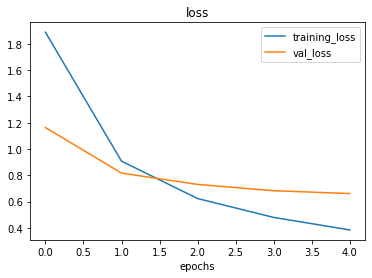

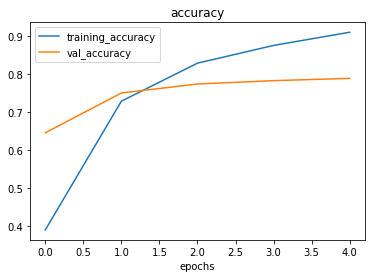

In [13]:
plot_loss_curves(resnet_history)

# Creating efficient Tensorflow hub feature Extraction mode

In [14]:
#lets make a create model() function to create a model from a url
def create_model_2(model_url,num_classes = 10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                            trainable= False,
                                            name ="feature_extraction_layer",
                                            input_shape =(224,224,3)
                                            )
  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes,
                   activation="softmax",
                   name="output_layer")
  ])
  return model

In [15]:
efficientnet_model = create_model_2(efficientnet_url,
                           num_classes=train_data.num_classes)


In [16]:
efficientnet_model.compile(loss ="categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=["accuracy"]
                     )

In [31]:
efficient_history = resnet_model.fit(train_data,
                                  epochs =5,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps=len(test_data),
                                  
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",experiment_name="efficientnetb0")]

                                  )

Epoch 1/5
24/24 [==============================] - 17s 696ms/step - loss: 0.0801 - accuracy: 0.9960 - val_loss: 0.6144 - val_accuracy: 0.7980
Epoch 2/5
24/24 [==============================] - 21s 898ms/step - loss: 0.0724 - accuracy: 0.9960 - val_loss: 0.6082 - val_accuracy: 0.7964
Epoch 3/5
24/24 [==============================] - 24s 1s/step - loss: 0.0653 - accuracy: 1.0000 - val_loss: 0.6146 - val_accuracy: 0.8020
Epoch 4/5
24/24 [==============================] - 16s 693ms/step - loss: 0.0604 - accuracy: 0.9987 - val_loss: 0.6087 - val_accuracy: 0.8052
Epoch 5/5
24/24 [==============================] - 16s 695ms/step - loss: 0.0549 - accuracy: 1.0000 - val_loss: 0.6132 - val_accuracy: 0.8000


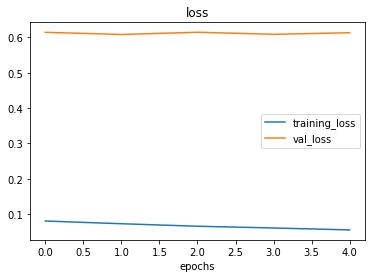

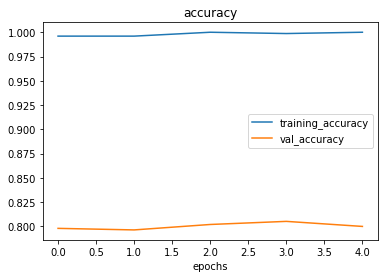

In [32]:
plot_loss_curves(efficient_history)

**checking our model efficieny with real data**

In [33]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg



--2022-09-25 08:03:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-09-25 08:03:01 (30.3 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]

--2022-09-25 08:03:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

In [34]:
#create a function to import and  image and resize it to be able to
def load_and_pred_image(filename,img_shape=224):
  #read in the image
  img = tf.io.read_file(filename)
  #decode the read file into tensor
  img=tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #rescale the image
  img=img/255.
  return img 

In [35]:
steak = load_and_pred_image("03-steak.jpeg")
pred=efficientnet_model.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.08797272, 0.05001877, 0.04960652, 0.11002175, 0.29851538,
        0.04476129, 0.07093076, 0.10861926, 0.11499292, 0.06456063]],
      dtype=float32)

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import pathlib
import random
import numpy as np
data_dir = pathlib.Path("10_food_classes_10_percent/train/") #create a lsit of clas name
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[:10]
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [37]:
def pred_and_plot(model,filename,class_names=class_names):
  #import the target image
  img = load_and_pred_image(filename)
  #make a prediciton
  pred = model.predict(tf.expand_dims(img,axis=0))
  #adding logic for multiclass to mmake 1 array
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #plot the image and prdict class
  plt.imshow(img)
  plt.title(f"Prediciton:{pred_class}")
  plt.axis(False)

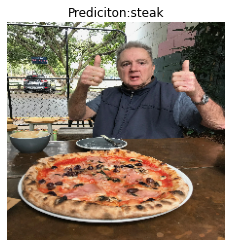

In [38]:
pred_and_plot(efficientnet_model,"03-pizza-dad.jpeg")

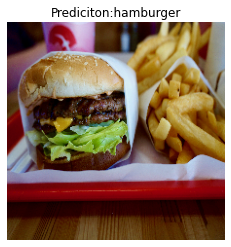

In [39]:
pred_and_plot(efficientnet_model,"03-hamburger.jpeg")

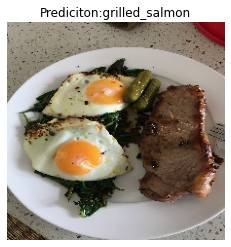

In [40]:
pred_and_plot(resnet_model,"03-steak.jpeg")

# Comparing our model Result using tensorboard

In [44]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs ResNet50V2" \
  --description "Comparing two diff TF hub feture extraction model architecture with 10% data"\
  --one_shot
  


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/OBL4JadARqSA41yAlE5JbA/

[2022-09-25T08:05:52] Started scanning logdir.
[2022-09-25T08:05:55] Total uploaded: 120 scalars, 0 tensors, 3 binary objects (5.3 MB)
[2022-09-25T08:05:55] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/OBL4JadARqSA41yAlE5JbA/


In [42]:
!tensorboard dev list

https://tensorboard.dev/experiment/Yd7jbrDKRguplymyuvjHMQ/
	Name                 EfficientNetB0 vs ResNet50V2
	Description          Comparing two diff TF hub feture extraction model architecture with 10% data
	Id                   Yd7jbrDKRguplymyuvjHMQ
	Created              2022-09-25 08:03:27 (1 minute ago)
	Updated              2022-09-25 08:03:29 (1 minute ago)
	Runs                 6
	Tags                 5
	Scalars              120
	Tensor bytes         0
	Binary object bytes  5530722
https://tensorboard.dev/experiment/j6CjED15R0KbsWq9kvNt0g/
	Name                 EfficientNetB0 vs ResNet50V2
	Description          Comparing two diff TF hub feture extraction model architecture with 10% data
	Id                   j6CjED15R0KbsWq9kvNt0g
	Created              2022-09-25 07:57:28 (7 minutes ago)
	Updated              2022-09-25 07:57:30 (7 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  3687148
https:/

In [43]:
!tensorboard dev delete --experiment_id Yd7jbrDKRguplymyuvjHMQ

Deleted experiment Yd7jbrDKRguplymyuvjHMQ.
